In [2]:
import numpy as np

import sys
sys.path.append("/home/alvaro/Desktop/MachineLearning/PracticalApplications/1-3/my-staff")
from utils import load_ds, show_confusion_matrix, show_report, eval_model

from mnn import create_model, train, show_train, predict

2023-10-01 21:14:48.598159: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-01 21:14:48.599789: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-01 21:14:48.622043: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-01 21:14:48.622073: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-01 21:14:48.622088: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [3]:
X, y, features_names, class_names = load_ds("multivariant")
X.shape

(293, 10)

In [4]:
X = X.astype(np.float32)
y = y.astype(np.float32)

# Hiperparametros

In [5]:
EPOCHS = 1000
BATCH_SIZE = 128  # Al haber pocos datos se puede meter el dataset entero en cada epoca
LEARNING_RATE = 1e-3
LAMBDA = 0.01
PATIENCE = 10

Entrenando con la técnica "early stopping" se evita que el modelo sobre ajuste, aunque puede hacer que el modelo le falten épocas de aprendizaje, como los resultados son muy buenos ya elegimos el modelo con menos neuronas y mejor resultado para que sea más eficiente. Además, con regularización ayuda a que el modelo no sobre ajuste.

# Create model

In [6]:
model_final = create_model([42], LAMBDA, len(class_names), LEARNING_RATE)

# Train


In [7]:
from sklearn.model_selection import train_test_split
from globals import TEST_SIZE, SEED

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                                y,
                                                                test_size=TEST_SIZE,
                                                                random_state=SEED)

print(len(X_train), len(X_test))

205 88


In [9]:
history = train(X_train, y_train, X_test, y_test, model_final, EPOCHS, BATCH_SIZE, verbose=True)

Epoch 1/1000
2/2 [==============================] - 0s 89ms/step - loss: 215.1666 - accuracy: 0.4244 - val_loss: 175.3170 - val_accuracy: 0.4318
Epoch 2/1000
2/2 [==============================] - 0s 15ms/step - loss: 167.6746 - accuracy: 0.4244 - val_loss: 129.1636 - val_accuracy: 0.4318
Epoch 3/1000
2/2 [==============================] - 0s 16ms/step - loss: 120.8221 - accuracy: 0.4244 - val_loss: 82.8073 - val_accuracy: 0.4318
Epoch 4/1000
2/2 [==============================] - 0s 15ms/step - loss: 71.6105 - accuracy: 0.4244 - val_loss: 36.2960 - val_accuracy: 0.4318
Epoch 5/1000
2/2 [==============================] - 0s 16ms/step - loss: 25.2862 - accuracy: 0.4537 - val_loss: 7.7161 - val_accuracy: 0.7159
Epoch 6/1000
2/2 [==============================] - 0s 16ms/step - loss: 8.0831 - accuracy: 0.7317 - val_loss: 17.6490 - val_accuracy: 0.7386
Epoch 7/1000
2/2 [==============================] - 0s 17ms/step - loss: 16.4746 - accuracy: 0.7756 - val_loss: 26.5401 - val_accuracy: 0.6

In [10]:
model_final.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 42)                462       
                                                                 
 dense (Dense)               (None, 2)                 86        
                                                                 
Total params: 548 (2.14 KB)
Trainable params: 548 (2.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


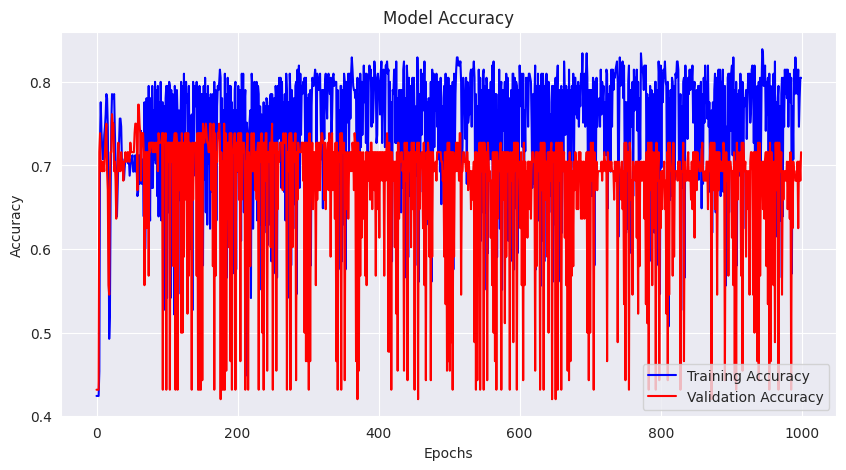

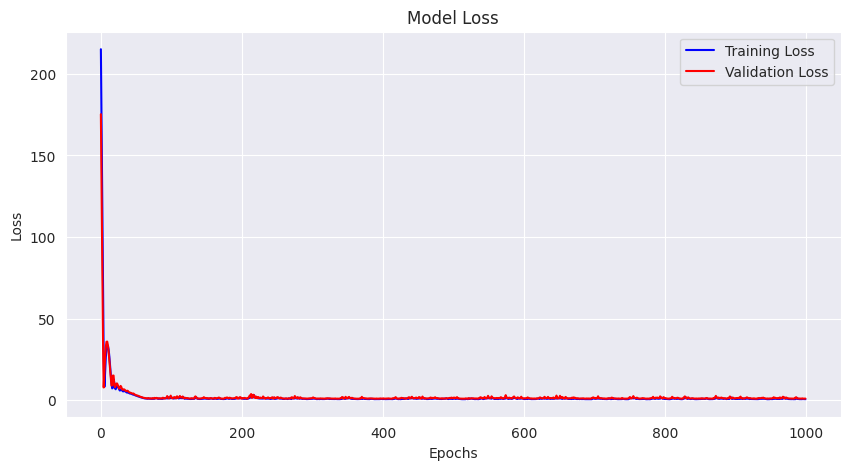

In [11]:
show_train(history)

3/3 [==============================] - 0s 2ms/step
{'0.0': {'precision': 0.6923076923076923, 'recall': 0.9, 'f1-score': 0.7826086956521738, 'support': 50.0}, '1.0': {'precision': 0.782608695652174, 'recall': 0.47368421052631576, 'f1-score': 0.5901639344262294, 'support': 38.0}, 'accuracy': 0.7159090909090909, 'macro avg': {'precision': 0.7374581939799332, 'recall': 0.6868421052631579, 'f1-score': 0.6863863150392016, 'support': 88.0}, 'weighted avg': {'precision': 0.7313013073882639, 'recall': 0.7159090909090909, 'f1-score': 0.6995075487591523, 'support': 88.0}}
              precision    recall  f1-score   support

         0.0       0.69      0.90      0.78        50
         1.0       0.78      0.47      0.59        38

    accuracy                           0.72        88
   macro avg       0.74      0.69      0.69        88
weighted avg       0.73      0.72      0.70        88



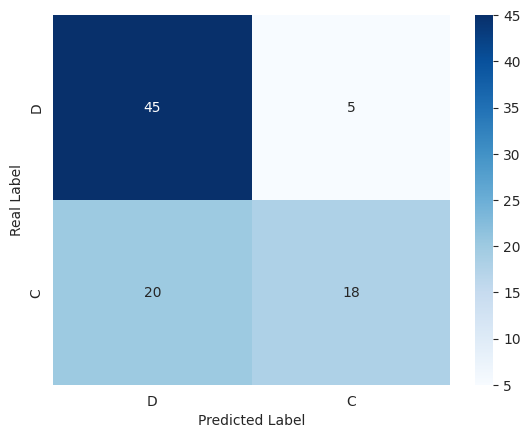

In [12]:
y_pred = predict(model_final, X_test)
show_report(y_test, y_pred)
show_confusion_matrix(y_test, y_pred, class_names)

In [13]:
eval_model(y_test, y_pred)

Métricas de evaluación:
Precision: 0.7313
Recall: 0.7159
F1-score: 0.6995


# Visualizacion

In [15]:
from keras.utils import plot_model

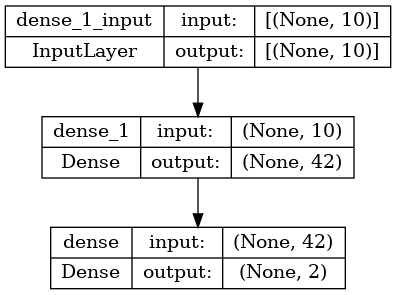

In [16]:
plot_model(model_final, show_shapes=True)

In [17]:
model_final.save('/home/alvaro/Downloads/modelo.h5')

/home/alvaro/Desktop/MachineLearning/PracticalApplications/.venv/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
